In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('/Users/johnngai/Desktop/final_project/ATP_matches_past_10_years_record/atp_matches_record_past_10_years.csv')

# Data in year 2017 has inconsistent values in column 'tourney_name' with the rest of the years
data.replace({'tourney_name':'Monte Carlo'}, value='Monte Carlo Masters', inplace=True)


In [2]:
two_data=data[((data['tourney_name']=='Monte Carlo Masters') | (data['tourney_name']=='Roland Garros')) & (data['round'].isin(['F','SF','QF','R16','R32','R64']))]

In [3]:
two_data['round']

858        F
859       SF
860       SF
861       QF
862       QF
863       QF
864       QF
865      R16
866      R16
867      R16
868      R16
869      R16
870      R16
871      R16
872      R16
873      R32
874      R32
875      R32
876      R32
877      R32
878      R32
879      R32
880      R32
881      R32
882      R32
883      R32
884      R32
885      R32
886      R32
887      R32
        ... 
68539    R32
68540    R32
68541    R32
68542    R32
68543    R32
68544    R32
68545    R32
68546    R32
68547    R32
68548    R32
68549    R32
68550    R32
68551    R32
68552    R32
68553    R32
68554    R16
68555    R16
68556    R16
68557    R16
68558    R16
68559    R16
68560    R16
68561    R16
68562     QF
68563     QF
68564     QF
68565     QF
68566     SF
68567     SF
68568      F
Name: round, Length: 3226, dtype: object

In [4]:
two_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3226 entries, 858 to 68568
Data columns (total 49 columns):
tourney_id            3226 non-null object
tourney_name          3226 non-null object
surface               3226 non-null object
draw_size             3226 non-null float64
tourney_level         3226 non-null object
tourney_date          3226 non-null float64
match_num             3226 non-null float64
winner_id             3226 non-null float64
winner_seed           2254 non-null float64
winner_entry          210 non-null object
winner_name           3226 non-null object
winner_hand           3226 non-null object
winner_ht             3070 non-null float64
winner_ioc            3226 non-null object
winner_age            3226 non-null float64
winner_rank           3224 non-null float64
winner_rank_points    3224 non-null float64
loser_id              3226 non-null float64
loser_seed            1120 non-null float64
loser_entry           454 non-null object
loser_name           

In [5]:
two_data.replace({'round': {'F': 1, 'SF': 1, 'QF':0, 'R16':0, 'R32':0, 'R64':0}},inplace=True)
two_data['round'].astype(float)

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5821: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


858      1.0
859      1.0
860      1.0
861      0.0
862      0.0
863      0.0
864      0.0
865      0.0
866      0.0
867      0.0
868      0.0
869      0.0
870      0.0
871      0.0
872      0.0
873      0.0
874      0.0
875      0.0
876      0.0
877      0.0
878      0.0
879      0.0
880      0.0
881      0.0
882      0.0
883      0.0
884      0.0
885      0.0
886      0.0
887      0.0
        ... 
68539    0.0
68540    0.0
68541    0.0
68542    0.0
68543    0.0
68544    0.0
68545    0.0
68546    0.0
68547    0.0
68548    0.0
68549    0.0
68550    0.0
68551    0.0
68552    0.0
68553    0.0
68554    0.0
68555    0.0
68556    0.0
68557    0.0
68558    0.0
68559    0.0
68560    0.0
68561    0.0
68562    0.0
68563    0.0
68564    0.0
68565    0.0
68566    1.0
68567    1.0
68568    1.0
Name: round, Length: 3226, dtype: float64

In [6]:
two_data['tourney_id']=two_data['tourney_id'].astype(str).apply(lambda x: x.split('-')[0])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
roland=two_data[(two_data['tourney_name']=='Roland Garros')&(two_data['tourney_id']=='2018')]['winner_name'].unique()

In [8]:
roland

array(['Rafael Nadal', 'Richard Gasquet', 'Maximilian Marterer',
       'Jurgen Zopp', 'Diego Sebastian Schwartzman', 'Borna Coric',
       'Mischa Zverev', 'Kevin Anderson', 'Marin Cilic', 'Steve Johnson',
       'Fabio Fognini', 'Kyle Edmund', 'John Isner',
       'Pierre Hugues Herbert', 'Albert Ramos', 'Juan Martin Del Potro',
       'David Goffin', 'Gael Monfils', 'Marco Cecchinato',
       'Pablo Carreno Busta', 'Roberto Bautista Agut', 'Novak Djokovic',
       'Fernando Verdasco', 'Grigor Dimitrov', 'Dominic Thiem',
       'Matteo Berrettini', 'Kei Nishikori', 'Gilles Simon',
       'Lucas Pouille', 'Karen Khachanov', 'Damir Dzumhur',
       'Alexander Zverev'], dtype=object)

In [9]:
monte=two_data[(two_data['tourney_name']=='Monte Carlo Masters')&(two_data['tourney_id']=='2018')]['winner_name'].unique()

In [10]:
monte

array(['Rafael Nadal', 'Kei Nishikori', 'Grigor Dimitrov',
       'Alexander Zverev', 'Dominic Thiem', 'David Goffin',
       'Richard Gasquet', 'Marin Cilic', 'Karen Khachanov',
       'Novak Djokovic', 'Philipp Kohlschreiber', 'Roberto Bautista Agut',
       'Mischa Zverev', 'Jan Lennard Struff', 'Andreas Seppi',
       'Milos Raonic', 'Aljaz Bedene', 'Gilles Simon', 'Borna Coric',
       'Andrey Rublev', 'Pierre Hugues Herbert', 'Albert Ramos',
       'Feliciano Lopez', 'Stefanos Tsitsipas',
       'Diego Sebastian Schwartzman', 'Fabio Fognini', 'Gilles Muller',
       'Daniil Medvedev', 'Marco Cecchinato', 'Fernando Verdasco'],
      dtype=object)

In [11]:
def intersection(lst1, lst2): 
    return [value for value in lst1 if value in lst2] 
    

In [12]:
common=intersection(monte,roland)

In [13]:
common_df=two_data[two_data['tourney_id']=='2018']

In [14]:
common_df['bp_percentage']=common_df.w_bpSaved/common_df.w_bpFaced

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
monte_model=common_df[common_df['tourney_name']=='Monte Carlo Masters']

In [16]:
useful_columns=['winner_name','winner_ht','winner_age','winner_rank','winner_rank_points','w_ace', 'w_df','w_1stWon','w_2ndWon', 'w_SvGms', 'bp_percentage','round']

In [17]:
monte_model=common_df[useful_columns].groupby('winner_name').mean()

In [18]:
monte_model

,winner_ht,winner_age,winner_rank,winner_rank_points,w_ace,w_df,w_1stWon,w_2ndWon,w_SvGms,bp_percentage,round
winner_name,,,,,,,,,,,
Albert Ramos,188.0,30.314031,31.200000,1454.000000,2.600000,2.600000,38.600000,10.800000,3.600000,0.687273,0.000000
Alexander Zverev,198.0,21.057358,3.400000,5339.000000,8.666667,5.733333,54.000000,22.800000,5.733333,0.542064,0.000000
Aljaz Bedene,181.0,28.744695,58.000000,877.000000,6.000000,2.000000,33.000000,13.000000,11.000000,0.500000,0.000000
Andreas Seppi,190.0,34.149213,62.000000,851.000000,5.500000,2.500000,37.500000,20.500000,15.000000,0.700758,0.000000
Andrey Rublev,NaN,20.487337,33.000000,1378.000000,2.000000,3.000000,58.000000,12.000000,16.000000,0.700000,0.000000
Borna Coric,NaN,21.487201,39.600000,1220.400000,10.400000,1.800000,33.200000,16.200000,3.600000,0.416667,0.000000
Damir Dzumhur,172.0,26.020534,29.000000,1415.000000,3.000000,4.000000,64.000000,26.000000,0.000000,0.285714,0.000000
Daniil Medvedev,NaN,22.176591,49.000000,984.000000,2.000000,2.000000,47.000000,30.000000,16.000000,0.875000,0.000000
David Goffin,163.0,27.425599,9.400000,3056.000000,3.400000,4.600000,41.200000,22.300000,4.600000,0.430000,0.000000


In [19]:
monte_model['round']=monte_model['round'].astype(str)

In [20]:
monte_model['round']

winner_name
Albert Ramos                                   0.0
Alexander Zverev                               0.0
Aljaz Bedene                                   0.0
Andreas Seppi                                  0.0
Andrey Rublev                                  0.0
Borna Coric                                    0.0
Damir Dzumhur                                  0.0
Daniil Medvedev                                0.0
David Goffin                                   0.0
Diego Sebastian Schwartzman                    0.0
Dominic Thiem                  0.15789473684210525
Fabio Fognini                                  0.0
Feliciano Lopez                                0.0
Fernando Verdasco                              0.0
Gael Monfils                                   0.0
Gilles Muller                                  0.0
Gilles Simon                                   0.0
Grigor Dimitrov                                0.0
Jan Lennard Struff                             0.0
John Isner         

In [21]:
corr=monte_model.corr()

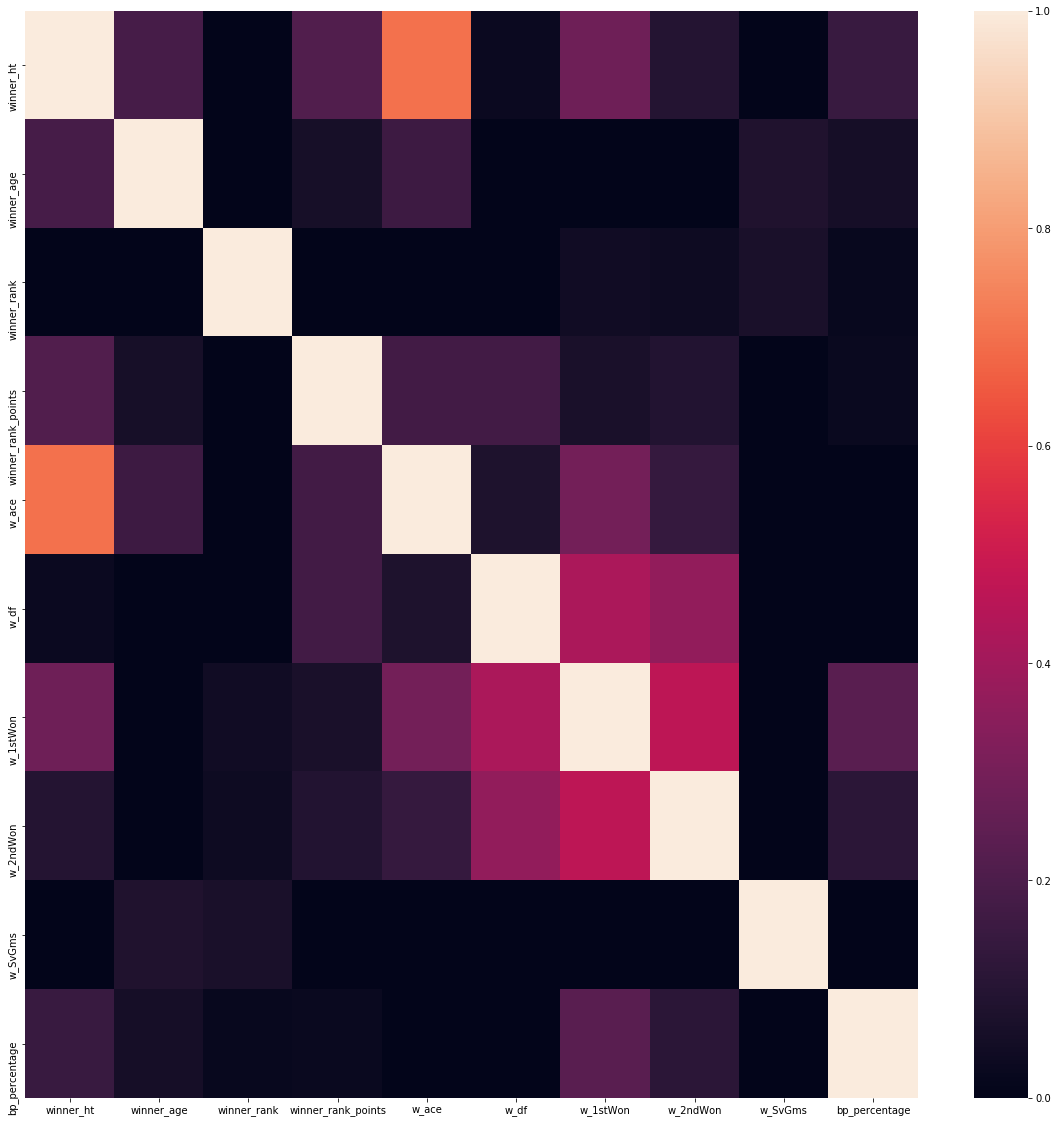

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,vmin=0)



In [23]:
ind=monte_model.columns[:-1]
ind

Index(['winner_ht', 'winner_age', 'winner_rank', 'winner_rank_points', 'w_ace',
       'w_df', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'bp_percentage'],
      dtype='object')

In [24]:
d=monte_model.columns[-1]
d

'round'

In [25]:
# Build model with Monte Carlo, make prediction on Roland Garros

monte_x=monte_model[ind]
monte_y=monte_model[d]


In [26]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np


xgb_model=xgb.XGBClassifier(eta=0.1,max_depth=10,min_child_weight=10)

x=monte_x
y=monte_y

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=10)

xgb_model.fit(x_train,y_train)

y_pred = xgb_model.predict(x_test)


In [28]:
cm=confusion_matrix(y_test,y_pred)

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94         8
       0.125       0.00      0.00      0.00         1

   micro avg       0.89      0.89      0.89         9
   macro avg       0.44      0.50      0.47         9
weighted avg       0.79      0.89      0.84         9



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


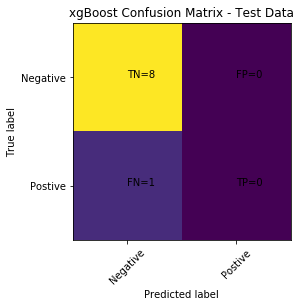

<Figure size 2160x2160 with 0 Axes>

In [30]:
plt.clf()
plt.imshow(cm,interpolation='nearest')
classNames=['Negative','Postive']
plt.title('xgBoost Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks=np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks,classNames)
s=[['TN','FP'],['FN','TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+"="+str(cm[i][j]))
        
plt.figure(figsize=(30,30))
plt.show()

In [31]:
roland_model=common_df[common_df['tourney_name']=='Roland Garros']

In [32]:
roland_model=common_df[useful_columns].groupby('winner_name').mean()

In [33]:
roland_x=monte_model[ind]
roland_y=monte_model[d]

In [34]:
x_r=roland_x
y_r=roland_y

x_train_r, x_test_r, y_train_r, y_test_r=train_test_split(x_r,y_r,test_size=0.2,random_state=10)

xgb_model.fit(x_train_r,y_train_r)

y_pred_r = xgb_model.predict(x_test_r)

In [35]:
confusion_matrix(y_test_r,y_pred_r)

array([[8, 0],
       [1, 0]])